*Note that this notebook is run using Google Colab*

In [1]:
import pandas as pd
!pip install krippendorff
import krippendorff
import numpy as np
import networkx as nx
import community.community_louvain as community_louvain
import matplotlib.pyplot as plt


In [84]:
!pip install transformers
import torch
import transformers

In [3]:
# Set the random seed for reproducibility
np.random.seed(13)

# Step 1: Data load and reshape

Load the data and pivot it so that each row represents an instance and each column represents a user. The values in this reshaped dataframe represent the offensiveness scores given by each user to each instance.

In [4]:
def load_and_pivot_data(file_path):
    """Load and pivot the data."""
    # Load the data
    data = pd.read_csv(file_path)
    print("Data Loaded Successfully\n")

    # Pivot the data so that each row is an instance and each column is a user, with the values being the offensiveness scores
    pivoted_data = data.pivot(index='instance_id', columns='user_id', values='offensiveness')
    print("Data Pivoted Successfully\n")

    return data, pivoted_data

In [5]:
# Load and pivot data
data, pivoted_data = load_and_pivot_data('offensiveness_popquorn.csv')

Data Loaded Successfully

Data Pivoted Successfully



In [12]:
data

,instance_id,user_id,text,offensiveness,gender,race,age,occupation,education
0,530,0,"I think a lot of Dethklok songs use drop C, wo...",1.0,Man,White,35-39,Unemployed,High school diploma or equivalent
1,1280,0,There are relatively simple ways around all of...,1.0,Man,White,35-39,Unemployed,High school diploma or equivalent
2,621,0,Tell the british soldier in WW1 to shoot that ...,1.0,Man,White,35-39,Unemployed,High school diploma or equivalent
3,676,0,Top comment pretty much. I have gay friends an...,1.0,Man,White,35-39,Unemployed,High school diploma or equivalent
4,635,0,Don't tell them just let them and their liniag...,3.0,Man,White,35-39,Unemployed,High school diploma or equivalent
...,...,...,...,...,...,...,...,...,...
13031,471,262,They’re closed anti-vaxx Facebook groups. When...,1.0,Woman,Asian,54-59,Self-employed,College degree
13032,1033,262,Bioethics; an interesting field in which the w...,1.0,Woman,Asian,54-59,Self-employed,College degree
13033,740,262,Or they are really secure but hang around inse...,5.0,Woman,Asian,54-59,Self-employed,College degree
13034,894,262,Don't have to worry about being too big to fit...,4.0,Woman,Asian,54-59,Self-employed,College degree


import numpy as np
from google.colab import autoviz
df_6051809808101256920 = autoviz.get_df('df_6051809808101256920')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6051809808101256920, *['instance_id'], **{})
chart

import numpy as np
from google.colab import autoviz
df_9158141066468756114 = autoviz.get_df('df_9158141066468756114')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_9158141066468756114, *['user_id'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6413718404392325824 = autoviz.get_df('df_6413718404392325824')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6413718404392325824, *['offensiveness'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4745229718947411081 = autoviz.get_df('df_4745229718947411081')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4745229718947411081, *['instance_id'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4188804280758563338 = autoviz.get_df('df_4188804280758563338')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4188804280758563338, *['user_id'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8186738278167823465 = autoviz.get_df('df_8186738278167823465')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8186738278167823465, *['offensiveness'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3287251399937693663 = autoviz.get_df('df_3287251399937693663')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_3287251399937693663, *['gender'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7781889366574142959 = autoviz.get_df('df_7781889366574142959')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_7781889366574142959, *['race'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1960592731698628962 = autoviz.get_df('df_1960592731698628962')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_1960592731698628962, *['occupation'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1512484485000589147 = autoviz.get_df('df_1512484485000589147')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_1512484485000589147, *['education'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3728244332599635572 = autoviz.get_df('df_3728244332599635572')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_3728244332599635572, *[[['instance_id', 'user_id'], ['user_id', 'offensiveness']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_4788083915643268584 = autoviz.get_df('df_4788083915643268584')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_4788083915643268584, *['gender', 'race'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4494115002009000550 = autoviz.get_df('df_4494115002009000550')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_4494115002009000550, *['race', 'occupation'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2968097797085170497 = autoviz.get_df('df_2968097797085170497')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_2968097797085170497, *['occupation', 'education'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1096699022320859848 = autoviz.get_df('df_1096699022320859848')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_1096699022320859848, *['instance_id', 'gender'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz
df_1816573059032714434 = autoviz.get_df('df_1816573059032714434')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_1816573059032714434, *['instance_id', 'race'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz
df_7876358236588344984 = autoviz.get_df('df_7876358236588344984')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_7876358236588344984, *['instance_id', 'occupation'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz
df_277687600366934794 = autoviz.get_df('df_277687600366934794')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_277687600366934794, *['instance_id', 'education'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz
df_4093912691356858953 = autoviz.get_df('df_4093912691356858953')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4093912691356858953, *['user_id', 'instance_id', 'gender'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2894763754292799311 = autoviz.get_df('df_2894763754292799311')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_2894763754292799311, *['user_id', 'instance_id', 'race'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2098866043659692042 = autoviz.get_df('df_2098866043659692042')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_2098866043659692042, *['user_id', 'instance_id', 'occupation'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1254702958429108974 = autoviz.get_df('df_1254702958429108974')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_1254702958429108974, *['user_id', 'instance_id', 'education'], **{})
chart

In [13]:
pivoted_data

user_id,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,261,262
instance_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Step 2: Calculate Agreement scores

Calculating Krippendorff's Alpha for each pair of users in the data. Krippendorff's Alpha is a statistical measure of the agreement between two or more raters for a set of items. It's used in content analysis to measure the extent to which different raters agree in their ratings. The agreement scores are being stored in a matrix here, and then the matrix is converted to a dataframe.

In [8]:
def calculate_agreement_scores(pivoted_data):
    """Calculate agreement scores."""
    # Initialise an empty matrix to hold the agreement scores
    agreement_matrix = np.zeros((pivoted_data.shape[1], pivoted_data.shape[1]))

    # Loop over pairs of annotators
    for i in range(pivoted_data.shape[1]):
        for j in range(i+1, pivoted_data.shape[1]):
            # Get the scores for the pair of annotators, excluding instances where either did not score
            pair_data = pivoted_data.iloc[:,[i,j]].dropna()

            # Check if all the ratings are the same
            if pair_data.nunique().max() <= 1:
                # If all the ratings are the same, set the agreement score to 1
                alpha = 1.0
            else:
                try:
                    # Otherwise, calculate Krippendorff's Alpha for the pair
                    alpha = krippendorff.alpha(pair_data.transpose().values, level_of_measurement='ordinal')
                except ZeroDivisionError:
                    print(f"Krippendorff's alpha calculation failed for user pair ({i},{j}). Setting agreement to zero.")
                    alpha = 0.0

            # Add the agreement score to the matrix
            agreement_matrix[i,j] = alpha
            agreement_matrix[j,i] = alpha

    # Create a DataFrame from the agreement matrix, with annotator IDs as the row and column labels
    agreement_df = pd.DataFrame(agreement_matrix, index=pivoted_data.columns, columns=pivoted_data.columns)
    print("Agreement Scores Calculated\n")

    return agreement_df

In [9]:
# Calculate agreement scores
agreement_df = calculate_agreement_scores(pivoted_data)


Agreement Scores Calculated



In [15]:
agreement_df

user_id,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,261,262
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,...,1.000000,1.000000,-0.416667,-0.233333,1.0,1.000000,1.000000,0.000000,1.0,1.000000
1,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,...,1.000000,-0.559140,-0.416667,0.250000,1.0,0.833333,-0.416667,0.498333,1.0,1.000000
2,1.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,...,1.000000,-0.233333,0.833333,1.000000,0.0,1.000000,-0.416667,1.000000,1.0,1.000000
3,1.0,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,...,0.597222,1.000000,0.301075,1.000000,1.0,1.000000,-0.583333,1.000000,1.0,0.000000
4,1.0,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0,...,0.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.0,-0.233333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,1.0,0.833333,1.000000,1.000000,1.000000,-0.500000,0.267442,0.625000,1.000000,1.0,...,1.000000,1.000000,1.000000,1.000000,1.0,0.000000,1.000000,1.000000,1.0,1.000000
258,1.0,-0.416667,-0.416667,-0.583333,1.000000,-0.416667,1.000000,-0.416667,0.318182,1.0,...,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.000000,1.000000,1.0,1.000000
259,0.0,0.498333,1.000000,1.000000,1.000000,-0.416667,1.000000,0.000000,1.000000,1.0,...,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,1.0,1.000000


# Step 3: Build graphs

In [16]:
def build_graph(data, agreement_df, include_demographics=True):
    """Build a graph."""
    # Initialise the graph
    G = nx.Graph()

    # Add nodes (users) to the graph
    for _, row in data.drop_duplicates('user_id').iterrows():
        # If include_demographics is True, add demographic attributes to the nodes
        if include_demographics:
            G.add_node(row['user_id'], gender=row['gender'], race=row['race'], age=row['age'], occupation=row['occupation'], education=row['education'])
        else:
            G.add_node(row['user_id'])

    # Add edges to the graph, with agreement scores as weights
    for user1 in agreement_df.columns:
        for user2 in agreement_df.columns:
            if user1 != user2:
                G.add_edge(user1, user2, weight=agreement_df.loc[user1, user2])

    print(f"Graph Built Successfully. {'With' if include_demographics else 'Without'} Demographics\n")

    return G

### Graph 1: Creating a graph where each node represents a user and each edge between two nodes represents the agreement score between those two users.

In [17]:
# Build graph without demographics
G_without_demographics = build_graph(data, agreement_df, include_demographics=False)

Graph Built Successfully. Without Demographics



In [25]:
G_without_demographics

In [24]:
# Print the number of nodes and edges in the graph
"""Should be the same as graph with demographics"""
len(G_without_demographics.nodes), len(G_without_demographics.edges)


(262, 34191)

### Graph 2: In this graph, also adding demographic attributes to the nodes to make use of demographic information of annotators.

In [30]:
# Build graph with demographics
G_with_demographics = build_graph(data, agreement_df, include_demographics=True)

Graph Built Successfully. With Demographics



In [26]:
G_with_demographics

In [20]:
# Print the number of nodes and edges in the graph
"""Should be the same as graph without demographics"""
len(G_with_demographics.nodes), len(G_with_demographics.edges)

(262, 34191)

# Step 4: Communtiy detection algorithms

### Method 1: Louvain algorithm

Partitioning the graph into communities of nodes (users) using the Louvain algorithms, which is an algorithm for detecting communities in large networks. then visualising the graph and printing out the communities.

In [57]:
def detect_communities(G):
    """Detect communities and visualize the graph."""
    # Compute the best partition using the Louvain method
    partition = community_louvain.best_partition(G)

    # Create a figure of size 8x8 inches
    plt.figure(figsize=(8, 8))

    # Create a dictionary that maps community numbers to different colors
    colors = {community: color for community, color in enumerate(set(partition.values()))}

    # Draw the nodes, with node color indicating community
    nx.draw_networkx_nodes(G, pos=nx.spring_layout(G), node_size=100, cmap=plt.cm.jet, node_color=[colors[partition[node]] for node in G.nodes])

    # Draw the edges
    nx.draw_networkx_edges(G, pos=nx.spring_layout(G), alpha=0.5)

    # Show the plot
    plt.show()

    return partition

In [58]:
def print_communities(partition):
    """Print out the communities."""
    # Create an empty dictionary for communities
    communities = {}

    # Loop through each node and their assigned community in the partition
    for node, community in partition.items():
        # If the community is not in the dictionary, add it with the node
        if community not in communities:
            communities[community] = [node]
        # If the community is already in the dictionary, append the node to it
        else:
            communities[community].append(node)

    # Print out the communities
    for community, nodes in communities.items():
        print(f"Community {community}: {nodes}")

    return communities

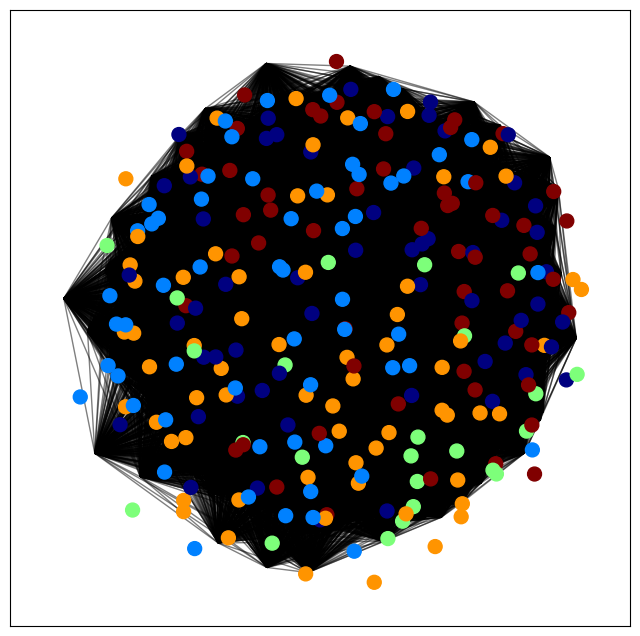

In [59]:
# Detect communities with demographics
partition_with_demographics = detect_communities(G_with_demographics)

In [60]:
# Print communities with demographics
communities_with_demographics = print_communities(partition_with_demographics)

Community 4: [0, 3, 4, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 93, 105, 189, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 229, 230, 231, 232]
Community 3: [1, 7, 37, 42, 62, 67, 70, 73, 79, 81, 82, 85, 86, 92, 94, 95, 96, 97, 98, 99, 100, 101, 103, 107, 108, 112, 114, 115, 116, 117, 119, 122, 123, 126, 132, 134, 142, 143, 145, 146, 147, 148, 154, 155, 157, 159, 163, 165, 166, 167, 168, 170, 175, 176, 178, 179, 180, 181, 182, 183, 184, 192, 197, 198, 199, 228]
Community 1: [2, 36, 38, 51, 54, 56, 58, 59, 61, 63, 65, 68, 88, 104, 106, 113, 120, 128, 137, 152, 171, 191, 193, 194, 195, 196, 200, 201, 202, 203, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 261, 262]
Community 2: [5, 32, 35, 39, 40, 41, 45, 48, 49, 52, 64, 71, 77, 87, 124, 127, 136, 144, 151, 158, 162, 173, 174, 186]
Com

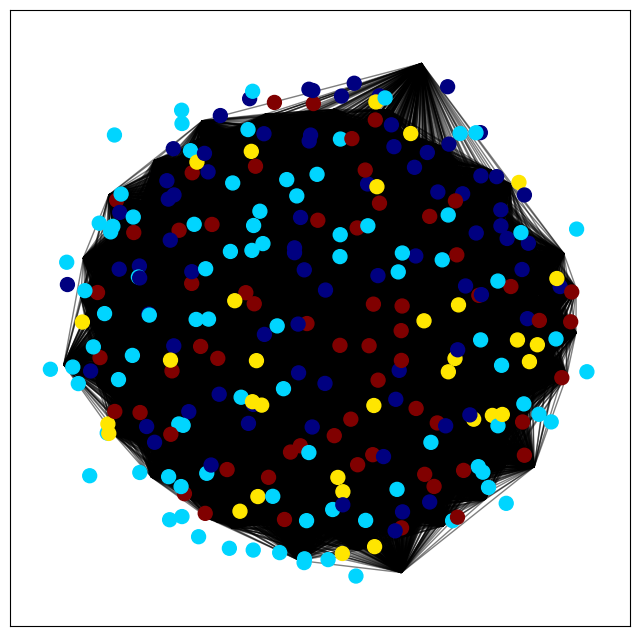

In [61]:
# Detect communities without demographics
partition_without_demographics = detect_communities(G_without_demographics)

In [62]:
# Print communities without demographics
communities_without_demographics = print_communities(partition_without_demographics)

Community 0: [0, 5, 6, 28, 30, 31, 33, 41, 44, 45, 50, 54, 55, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 78, 80, 82, 83, 84, 88, 91, 92, 93, 97, 98, 100, 109, 110, 111, 112, 118, 119, 121, 131, 139, 146, 148, 150, 151, 152, 153, 154, 157, 158, 160, 161, 163, 164, 166, 167, 169, 170, 174, 177, 181, 183, 184, 185, 186, 187, 188, 220, 239, 243, 247, 250, 256]
Community 2: [1, 7, 35, 38, 43, 46, 76, 77, 89, 90, 115, 120, 124, 125, 128, 130, 133, 135, 138, 140, 141, 142, 143, 144, 147, 149, 156, 162, 172, 189, 190, 262]
Community 1: [2, 3, 24, 32, 36, 37, 40, 42, 48, 53, 56, 58, 60, 61, 62, 79, 81, 85, 86, 87, 94, 95, 96, 99, 101, 102, 103, 105, 106, 107, 108, 113, 114, 116, 117, 122, 123, 126, 127, 132, 134, 136, 145, 155, 159, 165, 168, 171, 173, 175, 176, 178, 179, 180, 182, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 228, 233, 234, 235, 236, 237, 238, 240, 241, 242, 244, 245, 246, 248, 249, 251, 252, 254, 255, 257, 258, 261]
Community 3: [4, 8, 9, 10, 11, 12, 

The first appraoch (with demographics) takes into account the demographic attributes of the users when detecting communities, while the second one does not. In the first case, users with similar demographic attributes are more likely to be grouped together, while in the second case, users are grouped together solely based on their agreement scores. This is done to compare the communities detected by both methods to see how much of an effect demographics have on the grouping of users.

### Comparison of demographic models

In [69]:
def community_size(communities):
    """Compute the size of each community."""
    community_sizes = {name: len(members) for name, members in communities.items()}
    return community_sizes

def community_composition(data, communities):
    """Compute the composition of each community in terms of demographic attributes."""
    community_compositions = {}
    for name, members in communities.items():
        # Get the demographic attributes of the members
        demographics = data[data['user_id'].isin(members)][['gender', 'race', 'age', 'occupation', 'education']]
        # Compute the distribution of each attribute
        composition = {col: demographics[col].value_counts(normalize=True).to_dict() for col in demographics.columns}
        community_compositions[name] = composition
    return community_compositions

def community_overlap(communities1, communities2):
    """Compute the overlap between communities in two different partitions."""
    # Create sets of members for each community
    members1 = {name: set(members) for name, members in communities1.items()}
    members2 = {name: set(members) for name, members in communities2.items()}

    overlaps = {}
    for name1, set1 in members1.items():
        for name2, set2 in members2.items():
            # Compute the Jaccard index as the size of the intersection divided by the size of the union
            intersection = len(set1 & set2)
            union = len(set1 | set2)
            jaccard_index = intersection / union if union != 0 else 0  # handle the case when both sets are empty

            # Store the Jaccard index in the dictionary
            overlaps[(name1, name2)] = jaccard_index

    return overlaps

def average_agreement_within_communities(agreement_df, communities):
    """Compute the average agreement score within each community."""
    average_agreements = {}
    for name, members in communities.items():
        # Get the agreement scores between the members
        scores = agreement_df.loc[members, members].values.flatten()
        # Compute the average agreement score
        average_agreements[name] = scores.mean()
    return average_agreements

In [70]:
# Compare community sizes
print("Community Sizes With Demographics:")
print(community_size(communities_with_demographics))
print("Community Sizes Without Demographics:")
print(community_size(communities_without_demographics))

# Compare community compositions
print("Community Compositions With Demographics:")
print(community_composition(data, communities_with_demographics))
print("Community Compositions Without Demographics:")
print(community_composition(data, communities_without_demographics))

# Compare community overlaps
print("Community Overlaps:")
print(community_overlap(communities_with_demographics, communities_without_demographics))

# Compare average agreement within communities
print("Average Agreement Within Communities With Demographics:")
print(average_agreement_within_communities(agreement_df, communities_with_demographics))
print("Average Agreement Within Communities Without Demographics:")
print(average_agreement_within_communities(agreement_df, communities_without_demographics))

Community Sizes With Demographics:
{4: 57, 3: 66, 1: 58, 2: 24, 0: 57}
Community Sizes Without Demographics:
{0: 78, 2: 32, 1: 90, 3: 62}
Community Compositions With Demographics:
{4: {'gender': {'Woman': 0.561292588689849, 'Man': 0.42114506498068144, 'Non-binary': 0.017562346329469618}, 'race': {'White': 0.7024938531787847, 'Asian': 0.1053740779768177, 'Black or African American': 0.0874604847207587, 'Native American': 0.05233579206181946, 'Hispanic or Latino': 0.035124692658939236, 'Arab American': 0.017211099402880226}, 'age': {'30-34': 0.15770987003863715, '54-59': 0.14049877063575694, '35-39': 0.12293642430628732, '40-44': 0.08781173164734808, '50-54': 0.08781173164734808, '60-64': 0.08781173164734808, '>65': 0.08781173164734808, '18-24': 0.0874604847207587, '25-29': 0.0874604847207587, '45-49': 0.05268703898840885}, 'occupation': {'Employed': 0.5089567966280295, 'Unemployed': 0.17527221636810678, 'Self-employed': 0.12293642430628732, 'Retired': 0.08781173164734808, 'Student': 0.0

Community Sizes: These represent the number of individuals assigned to each community in both cases. For example, with demographics, community 4 has 57 members, while community 3 has 66 members. Without demographics, community 0 has 78 members and community 2 has 32 members.

Community Compositions: These are more detailed descriptions of the communities. They provide demographic distributions within each community. For instance, in community 4 (with demographics), 56% of members are women, 42% are men, and around 2% are non-binary. Similarly, other demographics like race, age, occupation, and education are also described.

Community Overlaps: This is a measure of how similar the communities are between the two partitionings (with and without demographics). For each pair of communities, it calculates the Jaccard index, which is the size of the intersection of the two communities divided by the size of their union. A higher value indicates a higher overlap. For example, communities 4 (with demographics) and 3 (without demographics) have a high overlap with a Jaccard index of 0.676.

Average Agreement Within Communities: This represents the average agreement of individuals within each community. Higher values indicate that individuals within the same community tend to have similar responses. In both cases (with and without demographics), all communities have high average agreement values, suggesting that the community structures are meaningful.

In summary, the results suggest that the community structures found with and without demographics are somewhat different, but there is still a lot of overlap. Also, the average agreement within communities is high in both cases, indicating that the community structures are meaningful and individuals within the same community tend to have similar responses.

### Method 2

# Step 5: Split data into community subsets

The data is then split according to the detected groups, creating a separate dataset for each group containing the annotations from the group's members.

In [78]:
def assign_community_labels(data, communities):
    """Assign community labels to data."""
    # Add a new column to the data for community labels
    data['community'] = None

    # Assign community labels to each row based on the user_id
    for community, users in communities.items():
        data.loc[data['user_id'].isin(users), 'community'] = community

    return data

def split_data_by_community(data, communities):
    """Split data into separate DataFrames for each community."""
    # Assign community labels
    data = assign_community_labels(data, communities)

    # Split data into separate DataFrames for each community
    community_dfs = {community: data[data['community'] == community] for community in communities.keys()}

    return community_dfs

# Split data and create DataFrames for both with and without demographics
community_dfs_with_demographics = split_data_by_community(data, communities_with_demographics)
community_dfs_without_demographics = split_data_by_community(data, communities_without_demographics)


In [79]:
community_dfs_with_demographics[0]

,instance_id,user_id,text,offensiveness,gender,race,age,occupation,education,community
1398,783,28,"I knew Hitler would come up in this post, what...",1.0,Man,Asian,35-39,Employed,College degree,0
1399,446,28,Imagine being mad at someone for trying to not...,1.0,Man,Asian,35-39,Employed,College degree,0
1400,114,28,It’s part the kneeling bc it’s directed at the...,1.0,Man,Asian,35-39,Employed,College degree,0
1401,171,28,"Reddit is filled with propaganda posts, maybe ...",1.0,Man,Asian,35-39,Employed,College degree,0
1402,857,28,Spongebob Squarepants the Movie Video Game,1.0,Man,Asian,35-39,Employed,College degree,0
...,...,...,...,...,...,...,...,...,...,...
12133,982,243,"Don't worry, I'm picking up good vibrations.",1.0,Woman,White,>65,Retired,College degree,0
12134,1278,243,How is never seeing them not affection depriva...,1.0,Woman,White,>65,Retired,College degree,0
12135,117,243,I love all these comments snidely saying thing...,1.0,Woman,White,>65,Retired,College degree,0
12136,183,243,This is a moronic take. Intelligence isn't a c...,1.0,Woman,White,>65,Retired,College degree,0


In [80]:
community_dfs_without_demographics[1]

,instance_id,user_id,text,offensiveness,gender,race,age,occupation,education,community
99,1069,2,in germany you can sell excess power afaik,1.0,Man,White,18-24,Employed,High school diploma or equivalent,1
100,1451,2,Kids. Also I don't date girls my friends have ...,1.0,Man,White,18-24,Employed,High school diploma or equivalent,1
101,1415,2,And republicans will still cry when they're ri...,5.0,Man,White,18-24,Employed,High school diploma or equivalent,1
102,1059,2,"Ready? If your view was correct, all strippers...",3.0,Man,White,18-24,Employed,High school diploma or equivalent,1
103,1314,2,Because it's what commonly happens. There's wh...,1.0,Man,White,18-24,Employed,High school diploma or equivalent,1
...,...,...,...,...,...,...,...,...,...,...
12981,1035,261,Ok now this is epic,1.0,Woman,White,54-59,Employed,Graduate degree,1
12982,1301,261,"Still have 2 unworn pairs under my bed, waitin...",1.0,Woman,White,54-59,Employed,Graduate degree,1
12983,212,261,Take out the first sentence and you're right. ...,1.0,Woman,White,54-59,Employed,Graduate degree,1
12984,732,261,Are they religious? If they're Catholic in par...,1.0,Woman,White,54-59,Employed,Graduate degree,1


# Step 6: Train Classification models for groups and compare their performances

### Train classifiers for communities with the demographic information

A classification model is trained for each group using the group's dataset and baseline is the whole dataset without community split and the performances of these models are compared.

In [91]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.4 MB/s eta 0:00:00


In [97]:
import torch
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tqdm import tqdm


In [98]:
# For reproducible results
torch.manual_seed(13)
np.random.seed(13)

Training model for community: 4


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at GroNLP/hateBERT and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/4
----------


  0%|          | 0/72 [00:00<?, ?it/s]<ipython-input-101-496ce7642e41>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])
100%|██████████| 9/9 [00:01<00:00,  4.99it/s]


Training loss: 1.2095072691639264, Validation loss: 1.0644532707002428
Epoch 2/4
----------


100%|██████████| 9/9 [00:01<00:00,  4.82it/s]


Training loss: 1.0895717003279262, Validation loss: 1.0098478727870517
Epoch 3/4
----------


100%|██████████| 9/9 [00:01<00:00,  4.83it/s]


Training loss: 1.011187648607625, Validation loss: 0.9963193933169047
Epoch 4/4
----------


100%|██████████| 9/9 [00:01<00:00,  4.80it/s]


Training loss: 0.9289097396863831, Validation loss: 0.9935081998507181


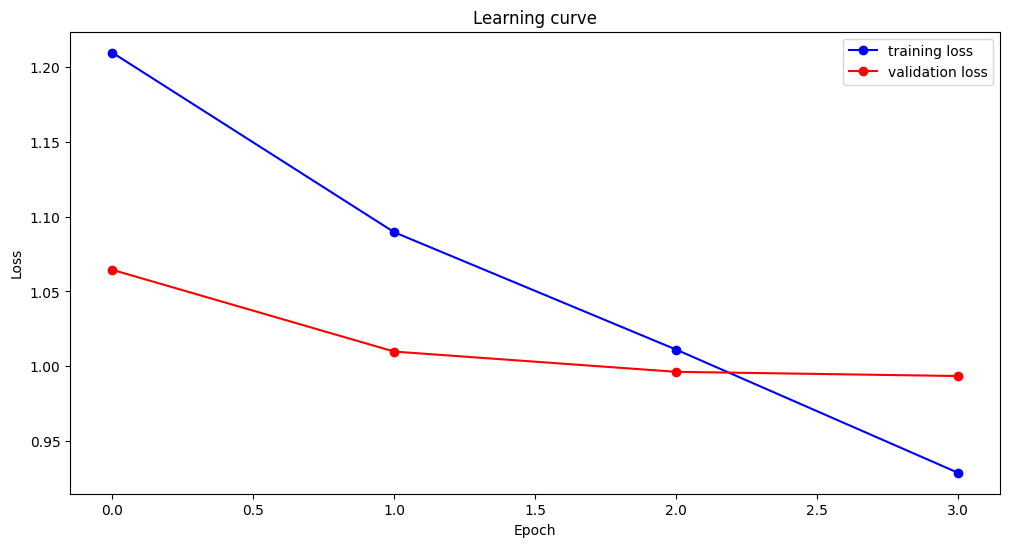

100%|██████████| 9/9 [00:01<00:00,  4.57it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.64      0.94      0.76       174
           1       0.21      0.15      0.18        39
           2       0.00      0.00      0.00        37
           3       0.00      0.00      0.00        22
           4       0.00      0.00      0.00        13

    accuracy                           0.60       285
   macro avg       0.17      0.22      0.19       285
weighted avg       0.42      0.60      0.49       285



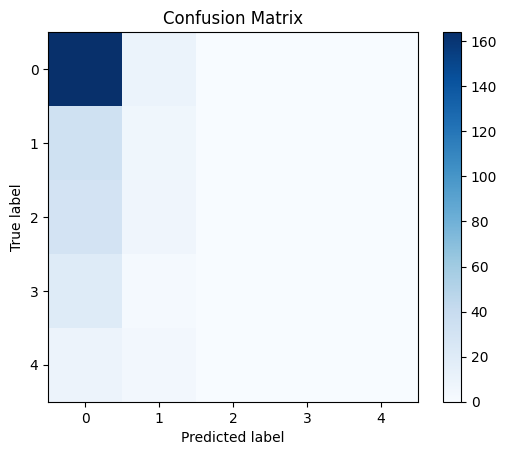

Training model for community: 3


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at GroNLP/hateBERT and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/4
----------


  0%|          | 0/82 [00:00<?, ?it/s]<ipython-input-101-496ce7642e41>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])
100%|██████████| 11/11 [00:02<00:00,  4.88it/s]


Training loss: 1.3291911381046946, Validation loss: 1.3947138027711348
Epoch 2/4
----------


100%|██████████| 11/11 [00:02<00:00,  4.83it/s]


Training loss: 1.2216301320529566, Validation loss: 1.3571563850749622
Epoch 3/4
----------


100%|██████████| 11/11 [00:02<00:00,  4.83it/s]


Training loss: 1.1107200362333438, Validation loss: 1.354882457039573
Epoch 4/4
----------


100%|██████████| 11/11 [00:02<00:00,  4.80it/s]


Training loss: 1.0449995551167466, Validation loss: 1.3582610433751887


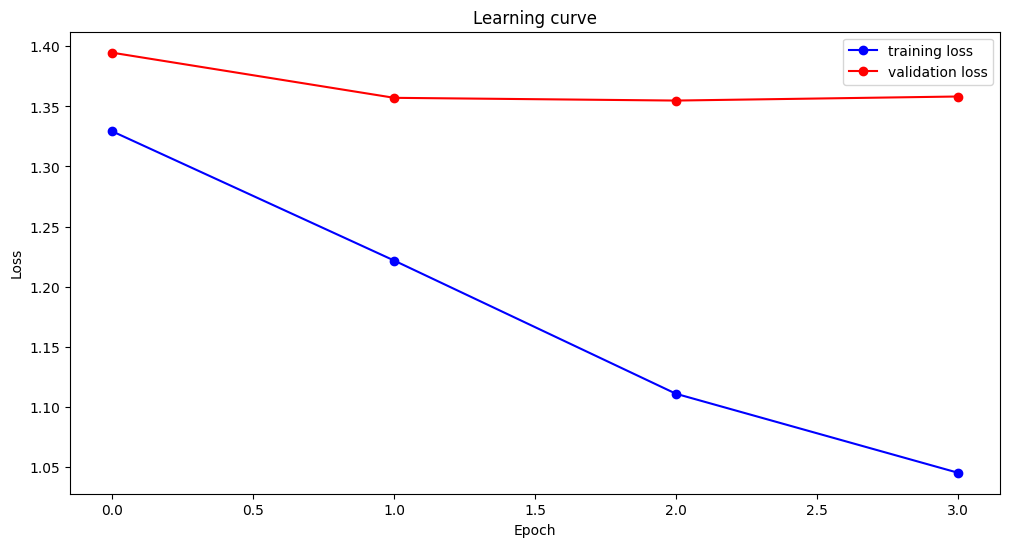

100%|██████████| 11/11 [00:02<00:00,  5.04it/s]


              precision    recall  f1-score   support

           0       0.60      0.87      0.71       168
           1       0.19      0.19      0.19        57
           2       0.29      0.08      0.13        49
           3       0.10      0.03      0.05        29
           4       0.00      0.00      0.00        24

    accuracy                           0.50       327
   macro avg       0.24      0.24      0.22       327
weighted avg       0.40      0.50      0.42       327



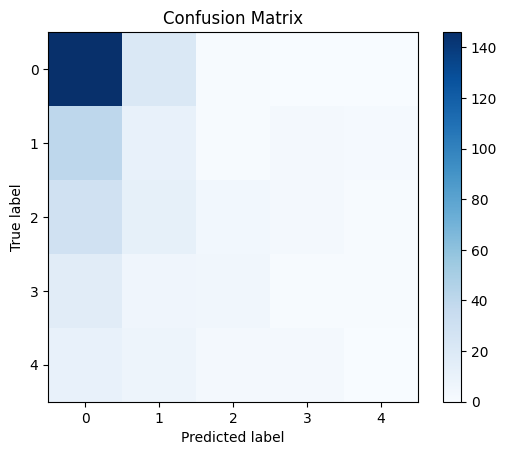

Training model for community: 1


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at GroNLP/hateBERT and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/4
----------


  0%|          | 0/73 [00:00<?, ?it/s]<ipython-input-101-496ce7642e41>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])
100%|██████████| 10/10 [00:01<00:00,  5.13it/s]


Training loss: 1.4127785547138894, Validation loss: 1.4209005951881408
Epoch 2/4
----------


100%|██████████| 10/10 [00:01<00:00,  5.17it/s]


Training loss: 1.300704247330966, Validation loss: 1.3314335584640502
Epoch 3/4
----------


100%|██████████| 10/10 [00:01<00:00,  5.18it/s]


Training loss: 1.2077537097343027, Validation loss: 1.2644356966018677
Epoch 4/4
----------


100%|██████████| 10/10 [00:01<00:00,  5.12it/s]


Training loss: 1.1392393373463252, Validation loss: 1.2489027976989746


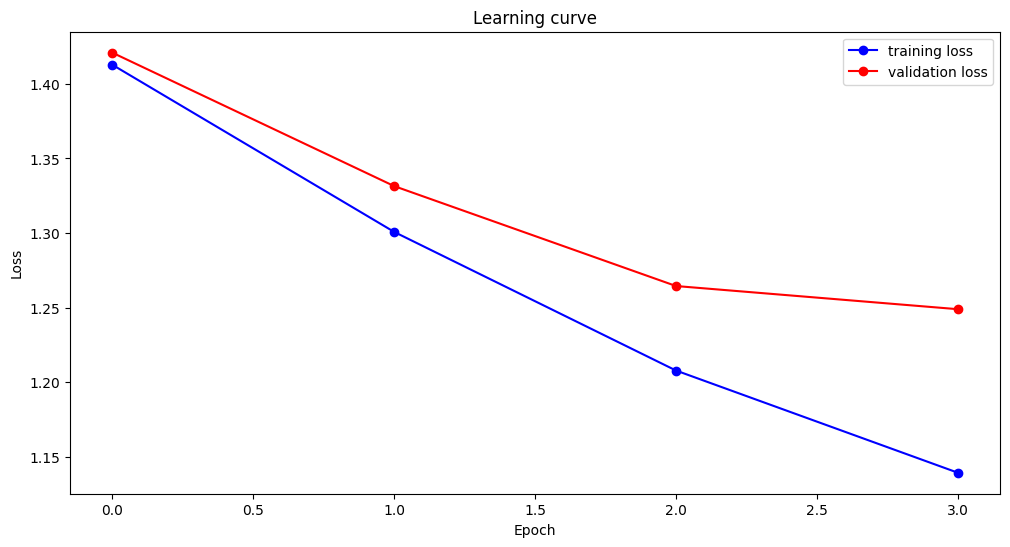

100%|██████████| 10/10 [00:02<00:00,  4.94it/s]


              precision    recall  f1-score   support

           0       0.52      0.85      0.64       133
           1       0.26      0.12      0.17        48
           2       0.33      0.27      0.30        56
           3       0.50      0.03      0.06        34
           4       1.00      0.05      0.10        19

    accuracy                           0.47       290
   macro avg       0.52      0.26      0.25       290
weighted avg       0.47      0.47      0.39       290



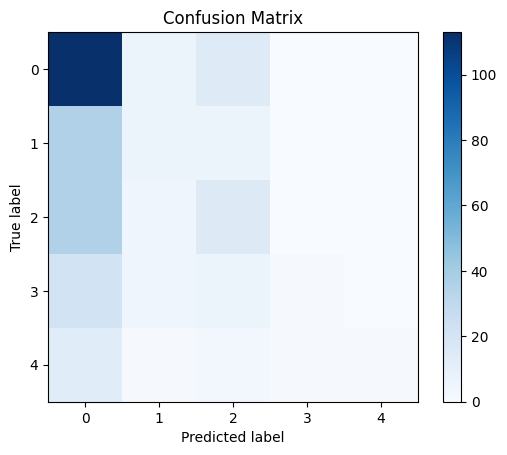

Training model for community: 2


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at GroNLP/hateBERT and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/4
----------


  0%|          | 0/30 [00:00<?, ?it/s]<ipython-input-101-496ce7642e41>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])
100%|██████████| 4/4 [00:00<00:00,  4.78it/s]


Training loss: 1.4553083737691244, Validation loss: 1.3399890065193176
Epoch 2/4
----------


100%|██████████| 4/4 [00:00<00:00,  4.71it/s]


Training loss: 1.33446706533432, Validation loss: 1.3070676624774933
Epoch 3/4
----------


100%|██████████| 4/4 [00:00<00:00,  4.73it/s]


Training loss: 1.2923718452453614, Validation loss: 1.304896205663681
Epoch 4/4
----------


100%|██████████| 4/4 [00:00<00:00,  4.76it/s]


Training loss: 1.2557734628518422, Validation loss: 1.2989976406097412


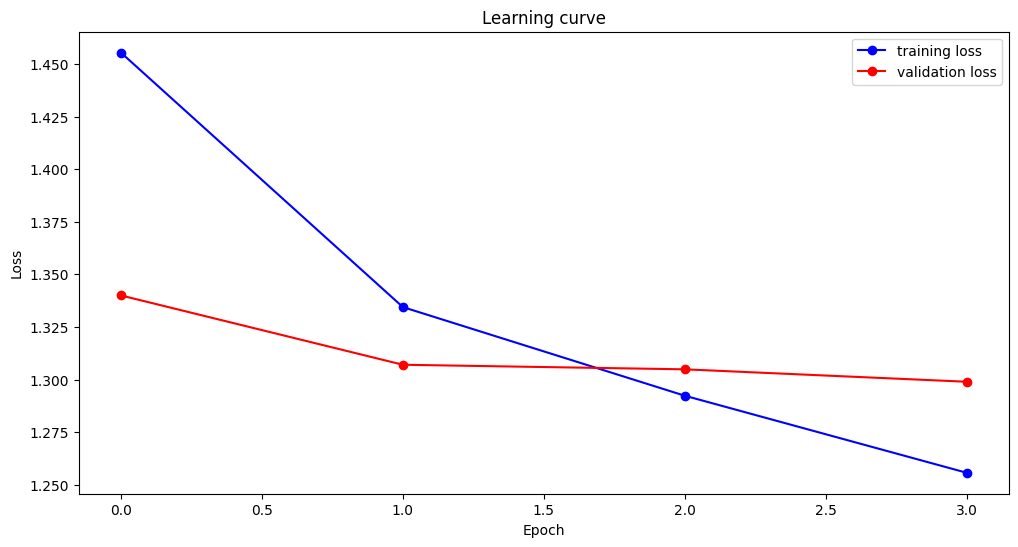

100%|██████████| 4/4 [00:00<00:00,  4.97it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.46      1.00      0.63        55
           1       0.00      0.00      0.00        32
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         6

    accuracy                           0.46       120
   macro avg       0.09      0.20      0.13       120
weighted avg       0.21      0.46      0.29       120



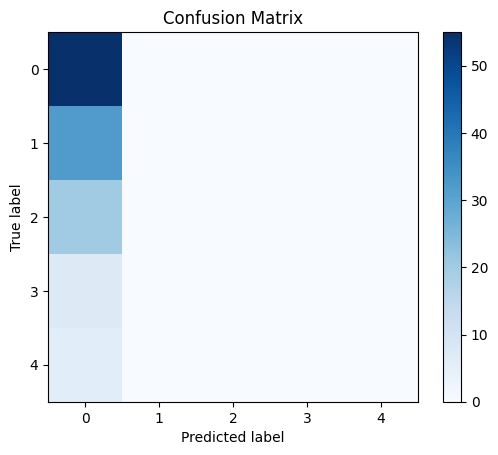

Training model for community: 0


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at GroNLP/hateBERT and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/4
----------


  0%|          | 0/71 [00:00<?, ?it/s]<ipython-input-101-496ce7642e41>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])
100%|██████████| 9/9 [00:01<00:00,  4.70it/s]


Training loss: 1.0306690133793253, Validation loss: 0.8853778110610114
Epoch 2/4
----------


100%|██████████| 9/9 [00:01<00:00,  4.72it/s]


Training loss: 0.8792644159894594, Validation loss: 0.8716374370786879
Epoch 3/4
----------


100%|██████████| 9/9 [00:01<00:00,  4.66it/s]


Training loss: 0.8189964613444368, Validation loss: 0.8553120560116239
Epoch 4/4
----------


100%|██████████| 9/9 [00:01<00:00,  4.73it/s]


Training loss: 0.7667258944309933, Validation loss: 0.8496855166223314


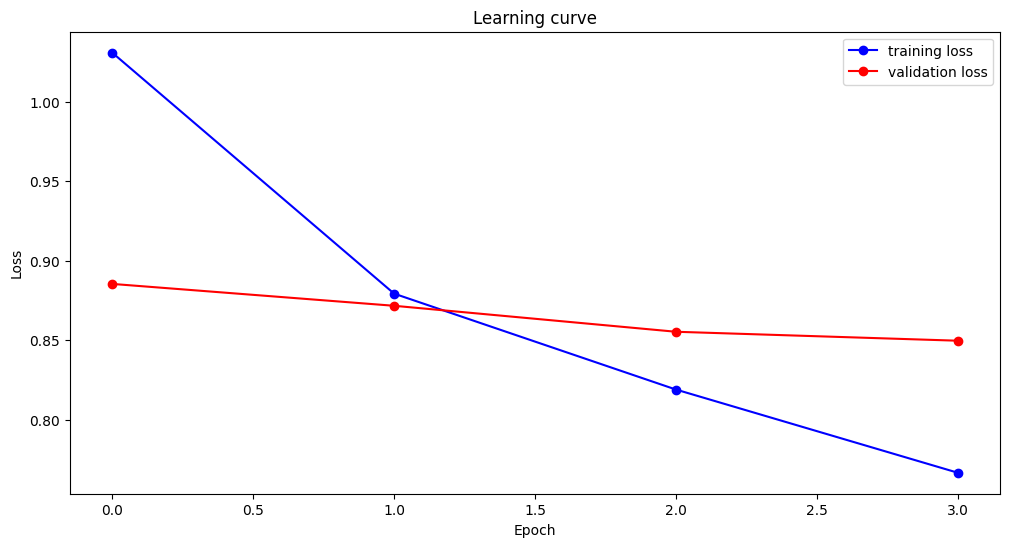

100%|██████████| 9/9 [00:02<00:00,  4.45it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.82      1.00      0.90       233
           1       0.00      0.00      0.00        26
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6

    accuracy                           0.82       284
   macro avg       0.16      0.20      0.18       284
weighted avg       0.67      0.82      0.74       284



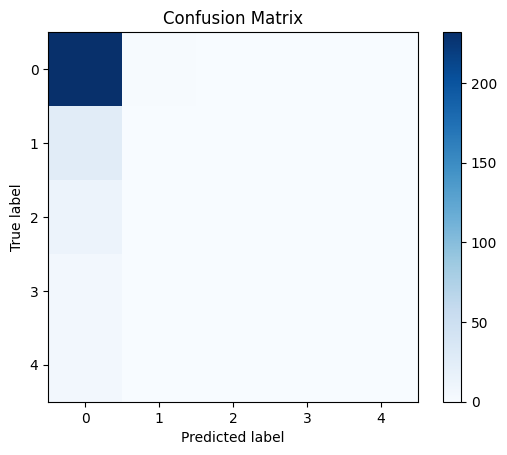

Training model for combined data


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at GroNLP/hateBERT and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/4
----------


  0%|          | 0/326 [00:00<?, ?it/s]<ipython-input-101-496ce7642e41>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])
100%|██████████| 41/41 [00:08<00:00,  4.69it/s]


Training loss: 1.1890734593195418, Validation loss: 1.1249516649944027
Epoch 2/4
----------


100%|██████████| 41/41 [00:08<00:00,  4.72it/s]


Training loss: 1.084016922792774, Validation loss: 1.1175232907620871
Epoch 3/4
----------


100%|██████████| 41/41 [00:08<00:00,  4.71it/s]


Training loss: 1.0407131866443378, Validation loss: 1.118140038920612
Epoch 4/4
----------


100%|██████████| 41/41 [00:08<00:00,  4.70it/s]


Training loss: 1.010294174306963, Validation loss: 1.1265846767076633


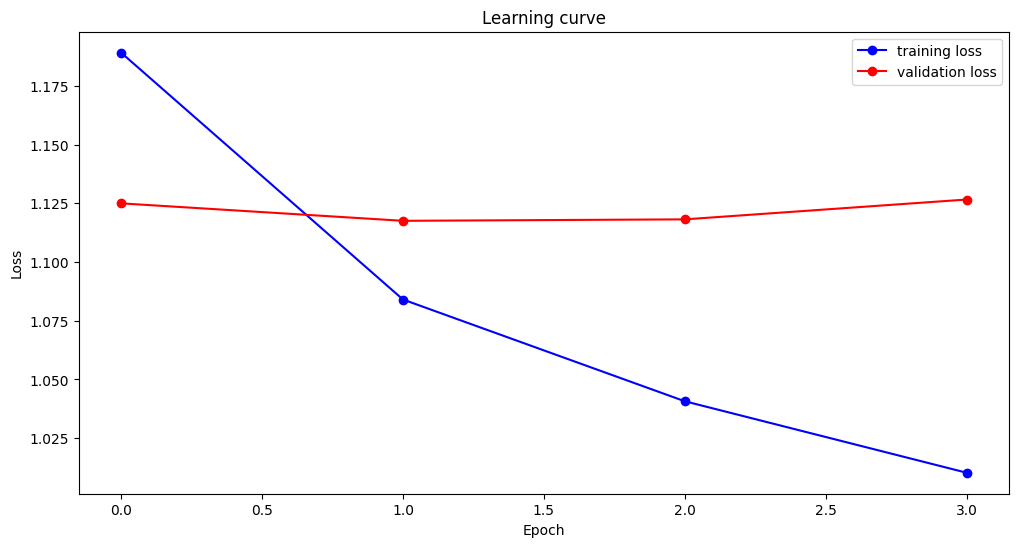

100%|██████████| 41/41 [00:08<00:00,  4.71it/s]


              precision    recall  f1-score   support

           0       0.64      0.91      0.75       748
           1       0.22      0.09      0.13       235
           2       0.28      0.08      0.12       163
           3       0.11      0.02      0.04        93
           4       0.26      0.29      0.28        65

    accuracy                           0.57      1304
   macro avg       0.30      0.28      0.26      1304
weighted avg       0.46      0.57      0.49      1304



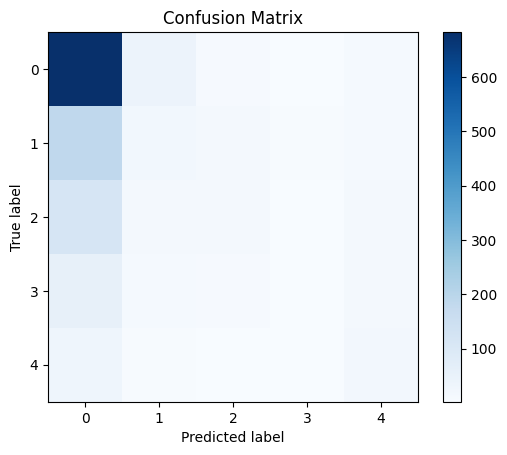

In [101]:
class HateSpeechDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)


def train(model, train_dataloader, validation_dataloader, optimizer, scheduler, device, epochs):
    loss_values = []
    validation_loss_values = []
    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")
        print("-" * 10)

        # Training
        model.train()
        total_loss = 0
        for batch in tqdm(train_dataloader):
            optimizer.zero_grad()
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            scheduler.step()
        avg_train_loss = total_loss / len(train_dataloader)
        loss_values.append(avg_train_loss)

        # Validation
        model.eval()
        total_eval_loss = 0
        for batch in tqdm(validation_dataloader):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            with torch.no_grad():
                outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_eval_loss += loss.item()
        avg_val_loss = total_eval_loss / len(validation_dataloader)
        validation_loss_values.append(avg_val_loss)

        print(f"Training loss: {avg_train_loss}, Validation loss: {avg_val_loss}")
    return loss_values, validation_loss_values


def evaluate(model, dataloader, device):
    model.eval()
    predictions, true_labels = [], []
    for batch in tqdm(dataloader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        logits = logits.detach().cpu().numpy()
        label_ids = labels.to('cpu').numpy()
        predictions.append(logits)
        true_labels.append(label_ids)
    predictions = np.concatenate(predictions, axis=0)
    true_labels = np.concatenate(true_labels, axis=0)
    return predictions, true_labels


def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix", cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]), title=title, ylabel='True label', xlabel='Predicted label')
    plt.show()


def plot_loss_curves(loss_values, validation_loss_values):
    plt.figure(figsize=(12, 6))
    plt.plot(loss_values, 'b-o', label="training loss")
    plt.plot(validation_loss_values, 'r-o', label="validation loss")
    plt.title("Learning curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


def prepare_dataset_and_loaders(df, tokenizer, device):
    # Split the data into training, validation, and testing sets
    train_texts, temp_texts, train_labels, temp_labels = train_test_split(df['text'], df['offensiveness'] - 1, test_size=.2, random_state=13)
    val_texts, test_texts, val_labels, test_labels = train_test_split(temp_texts, temp_labels, test_size=.5, random_state=13)

    # Tokenize the texts
    train_encodings = tokenizer(train_texts.to_list(), truncation=True, padding=True, max_length=128)
    val_encodings = tokenizer(val_texts.to_list(), truncation=True, padding=True, max_length=128)
    test_encodings = tokenizer(test_texts.to_list(), truncation=True, padding=True, max_length=128)

    # Convert the labels to integer tensor
    train_labels = torch.tensor(train_labels.tolist()).long()
    val_labels = torch.tensor(val_labels.tolist()).long()
    test_labels = torch.tensor(test_labels.tolist()).long()

    # Convert the encodings and labels into a Dataset object
    train_dataset = HateSpeechDataset(train_encodings, train_labels)
    val_dataset = HateSpeechDataset(val_encodings, val_labels)
    test_dataset = HateSpeechDataset(test_encodings, test_labels)

    # Set up the data loaders
    train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=32)
    validation_dataloader = DataLoader(val_dataset, sampler=SequentialSampler(val_dataset), batch_size=32)
    test_dataloader = DataLoader(test_dataset, sampler=SequentialSampler(test_dataset), batch_size=32)

    return train_dataloader, validation_dataloader, test_dataloader, test_labels


# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('GroNLP/hateBERT', do_lower_case=True)

# Specify the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Get the data for each community
community_dfs_with_demographics = split_data_by_community(data, communities_with_demographics)

# dictionary to store models
community_models = {}

# Train a separate model for each community
for community, df in community_dfs_with_demographics.items():
    print(f"Training model for community: {community}")

    train_dataloader, validation_dataloader, test_dataloader, test_labels = prepare_dataset_and_loaders(df, tokenizer, device)

    # Initialize the BERT model
    model = BertForSequenceClassification.from_pretrained('GroNLP/hateBERT', num_labels=5)
    model.to(device)

    # Set up the optimizer and scheduler
    optimizer = AdamW(model.parameters(), lr=2e-5)
    epochs = 4
    scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(train_dataloader) * epochs)

    # Train the model and get the loss values
    loss_values, validation_loss_values = train(model, train_dataloader, validation_dataloader, optimizer, scheduler, device, epochs)

    # Plot the loss curves
    plot_loss_curves(loss_values, validation_loss_values)

    # Evaluate the model on the test set
    predictions, true_labels = evaluate(model, test_dataloader, device)

    # Print the classification report
    print(classification_report(true_labels, predictions.argmax(axis=1)))

    # Plot the confusion matrix
    plot_confusion_matrix(true_labels, predictions.argmax(axis=1))

    # Store the model
    community_models[community] = model


# Combine all communities data
combined_df = pd.concat(community_dfs_with_demographics.values(), ignore_index=True)

# Train the combined model
print("Training model for combined data")

train_dataloader, validation_dataloader, test_dataloader, test_labels = prepare_dataset_and_loaders(combined_df, tokenizer, device)

# Initialize the BERT model
combined_model = BertForSequenceClassification.from_pretrained('GroNLP/hateBERT', num_labels=5)
combined_model.to(device)

# Set up the optimizer and scheduler
optimizer = AdamW(combined_model.parameters(), lr=2e-5)
epochs = 4
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(train_dataloader) * epochs)

# Train the model and get the loss values
loss_values, validation_loss_values = train(combined_model, train_dataloader, validation_dataloader, optimizer, scheduler, device, epochs)

# Plot the loss curves
plot_loss_curves(loss_values, validation_loss_values)

# Evaluate the model on the test set
predictions, true_labels = evaluate(combined_model, test_dataloader, device)

# Print the classification report
print(classification_report(true_labels, predictions.argmax(axis=1)))

# Plot the confusion matrix
plot_confusion_matrix(true_labels, predictions.argmax(axis=1))

# Store the model as baseline
baseline_model = combined_model


- The model trained on Community 4 performs better on its own community data with an accuracy of 60% but underperforms when compared to the baseline model's accuracy of 57% on the combined data. This could be attributed to the fact that Community 4 has higher inter-rater reliability than the combined data from all communities, meaning that the annotations in Community 4 are more coherent when considered independently.
- Community 3, despite having a high inter-rater reliability, performs poorly with an accuracy of 50% on its own community data compared to the baseline model's performance. This might suggest that while the annotations within Community 3 are coherent, they are less coherent with respect to the annotations from other communities.
- Community 2 shows the lowest performance on its own data and significantly underperforms compared to the baseline model. This could be due to its low inter-rater reliability score, indicating less coherence in the annotations within this community.
- Community 0 performs exceptionally well with an accuracy of 82% on its own data, much higher than the baseline model's performance. This suggests that specific characteristics of Community 0 make a community-specific model more effective.
- The baseline model trained on combined data from all communities performs at an intermediate level compared to the community-specific models, with an accuracy of 57%. This indicates that it has a balanced performance across different communities but doesn't excel for specific communities as the community-specific models do.